<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import requests
import json
from tqdm.auto import tqdm
from collections import defaultdict
import pickle 
import pandas as pd

In [24]:
#&area={moscow}
sber = '3529'
page = 1
num_per_page = 100
#moscow = 1  &area={moscow}
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}'

In [25]:
res = requests.get(url)

In [26]:

vacancies = res.json()
num_pages = vacancies.get('pages')
vacancy_ids = [el.get('id') for el in vacancies.get('items')]

In [ ]:
# Задание вытащить все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, подумайте как его обойти)
# Вытащите все описания этих вакансий
# Создайте аналогичный vacancy DataFrame только добавьте поле skills
# Переведите даты публикаций в datetime
# Постройте график опубликованных вакансий по датам
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
# Найдите те вакансии с использованием python, которые вам интересны
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и
# Постройте график наиболее востребованных вакансий

In [228]:
vacancies

In [18]:
from tqdm import tqdm_notebook
hh = []
for i in tqdm_notebook(range(0, 15)):
    for j in tqdm_notebook(range(0, 100)):
        hh.append(requests.get("https://api.hh.ru/vacancies?employer_id=3529", params={'page': i, 'per_page':100,'area':1}).json()['items'][j]['alternate_url'])


<ipython-input-18-811a8d84e832>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0, 15)):


<ipython-input-18-811a8d84e832>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tqdm_notebook(range(0, 100)):


IndexError: list index out of range

In [19]:
import regex as re
qq = [re.sub(r'[^0-9]', '', e) for e in hh]
vac_url_1 = 'https://api.hh.ru/vacancies/{}'

In [20]:
vac_hh_1 = []
for i in qq:
    vac_hh_1.append(requests.get(vac_url_1.format(i)).json())

In [21]:
df_1 = pd.DataFrame(vac_hh_1)


In [23]:
df_1.id.nunique()


1399

In [27]:
df_1['description'] = df_1['description'].apply(lambda x: (re.sub(r'<.*?>', '', str(x))))

In [28]:
HH = df_1.copy() 

In [208]:
# Создайте аналогичный vacancy DataFrame только добавьте поле skills
HH['skills'] = [[xx.get('name') for xx in x] for x in HH.get('key_skills')]

In [210]:
HH_2 = HH.drop(['premium', 'billing_type', 'relations','insider_interview',  'salary',
       'type', 'address', 'allow_messages', 'site', 'experience', 'schedule',
       'employment',  
       'branded_description', 'vacancy_constructor_template', 'key_skills',
       'accept_handicapped', 'accept_kids', 'archived', 'response_url',
        'code', 'hidden', 'quick_responses_allowed',
       'driver_license_types', 'accept_incomplete_resumes', 'employer','working_days', 'working_time_intervals',
       'working_time_modes',
       'published_at', 'suitable_resumes_url', 'apply_alternate_url', 'has_test', 'test','response_letter_required','contacts','negotiations_url',
       'alternate_url','accept_temporary'],axis=1)

In [211]:
HH_2.head() 

id                                               name  \
0  32698117                                   Разработчик Java   
1  33464069  Администратор IT систем / SRE (команда SberDev...   
2  36730688                            IOS developer (Sber ID)   
3  36737287                  IOS developer (Зарплатный проект)   
4  37735943                           Аналитик/разработчик DWH   

                                                area  \
0  {'id': '1', 'name': 'Москва', 'url': 'https://...   
1  {'id': '1', 'name': 'Москва', 'url': 'https://...   
2  {'id': '1', 'name': 'Москва', 'url': 'https://...   
3  {'id': '1', 'name': 'Москва', 'url': 'https://...   
4  {'id': '1', 'name': 'Москва', 'url': 'https://...   

                                          department  \
0  {'id': '3529-3529-prof', 'name': 'Сбер для экс...   
1  {'id': '3529-3529-prof', 'name': 'Сбер для экс...   
2  {'id': '3529-3529-prof', 'name': 'Сбер для экс...   
3  {'id': '3529-3529-prof', 'name': 'Сбер для экс...   
4  {'id': '3529-3529-prof', 'name': 'Сбер для экс...   

                                         description  \
0  Мы – трайб Риски корпоративно-инвестиционного ...   
1  SberDevices – направление компании, которое за...   
2  Sber ID – единый цифровой паспорт экосистемы с...   
3  Сбербанк - крупнейший банк в России (88 млн ак...   
4  Хотите работать с самой большой базой данных ф...   

                                     specializations  \
0  [{'id': '1.221', 'name': 'Программирование, Ра...   
1  [{'id': '1.395', 'name': 'Банковское ПО', 'pro...   
2  [{'id': '1.395', 'name': 'Банковское ПО', 'pro...   
3  [{'id': '1.395', 'name': 'Банковское ПО', 'pro...   
4  [{'id': '1.395', 'name': 'Банковское ПО', 'pro...   

                 created_at                                             skills  
0  2021-04-09T16:08:52+0300                                             [Java]  
1  2021-04-04T23:03:32+0300                                                 []  
2  2021-04-06T17:21:05+0300       [Git, iOS, ООП, Objective-C, SWIFT Alliance]  
3  2021-04-06T17:21:05+0300  [Git, Objective-C, Agile Project Management, Р...  
4  2021-04-09T16:08:52+0300         [Oracle Pl/SQL, Java, Python, SQL, Hadoop]

In [172]:
# Переведите даты публикаций в datetime
HH_2.created_at=pd.to_datetime(HH_2.created_at)     #.dt.date - с ним не хочет делать график

In [173]:
HH_2_series = HH_2.set_index('name')['created_at']
HH_2_series.head()

name
Разработчик Java                                      2021-04-09 16:08:52+03:00
Администратор IT систем / SRE (команда SberDevices)   2021-04-04 23:03:32+03:00
IOS developer (Sber ID)                               2021-04-06 17:21:05+03:00
IOS developer (Зарплатный проект)                     2021-04-06 17:21:05+03:00
Аналитик/разработчик DWH                              2021-04-09 16:08:52+03:00
Name: created_at, dtype: datetime64[ns, pytz.FixedOffset(180)]

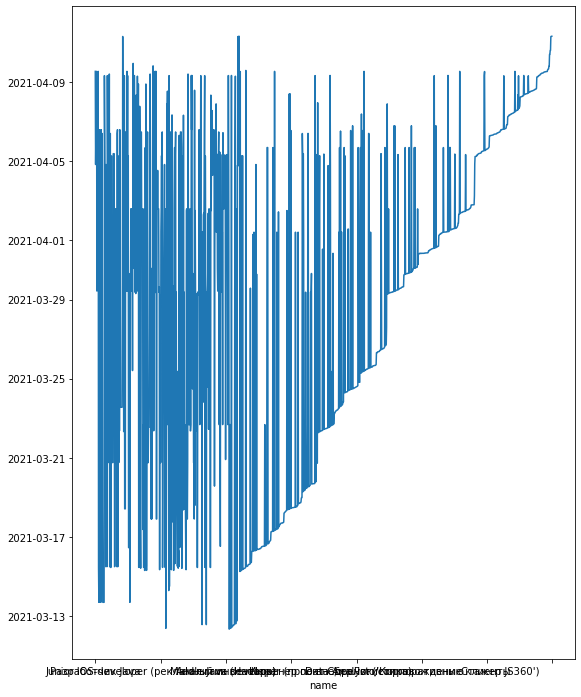

In [192]:
# Постройте график опубликованных вакансий по датам
HH_2_series.plot(kind= 'line');  

In [175]:
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий

HH_2['day_of_week'] = HH_2['created_at'].dt.dayofweek

days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

HH_2['day_of_week']= HH_2['day_of_week'].apply(lambda x: days[x])

In [180]:
vacs = HH_2.groupby('day_of_week')['name'].count().reset_index()
vacs = vacs.sort_values(by='name',ascending=False)
vacs.nlargest(7,'name')

day_of_week  name
1         Mon   369
0         Fri   266
4       Thurs   245
5        Tues   241
6        Weds   200
3         Sun    40
2         Sat    38

In [181]:
#Найдите те вакансии с использованием python, которые вам интересны

s='аналитик данных|data analyst'
HH_2[HH_2.name.str.lower().str.contains(s)]
python_s= 'python'
t1=HH_2.name.str.lower().str.contains(s)
t2=HH_2.description.str.lower().str.contains(python_s)
HH_2[t1 & t2].shape

(19, 9)

In [ ]:
# Постройте график наиболее востребованных вакансий

In [189]:
vacs_ver = HH_2.groupby('name')['id'].count().reset_index()
vacs_ver  = vacs_ver.sort_values(by='id',ascending=False)
vacs_ver.nlargest(7,'id')

name  id
1108                Системный аналитик  27
266                     Java developer   7
842           Инженер по сопровождению   7
685                    Бизнес-аналитик   7
613                           Аналитик   6
761                Водитель-инкассатор   6
780   Главный инженер по сопровождению   5

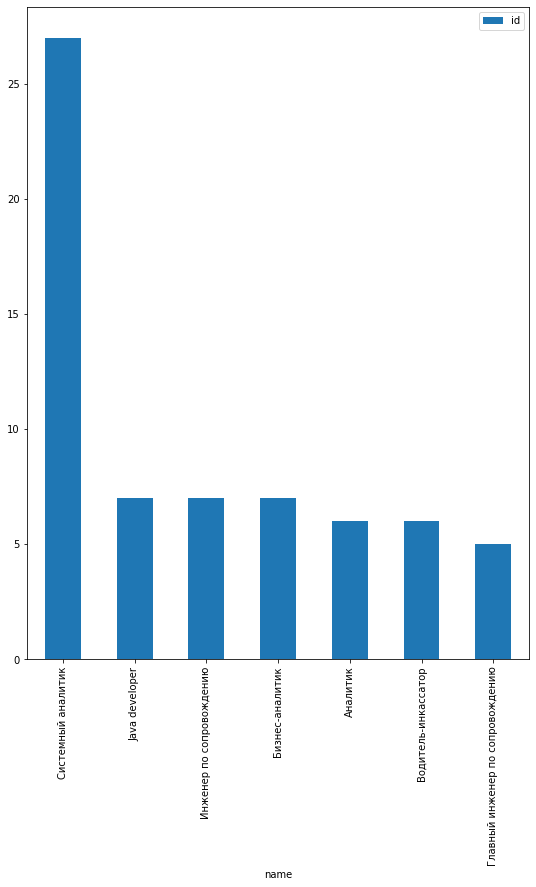

In [195]:
vacs_ver.nlargest(7,'id').set_index('name').plot(kind='bar');

In [ ]:
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий

In [218]:
HH_2['skills']

0                                                  [Java]
1                                                      []
2            [Git, iOS, ООП, Objective-C, SWIFT Alliance]
3       [Git, Objective-C, Agile Project Management, Р...
4              [Oracle Pl/SQL, Java, Python, SQL, Hadoop]
                              ...                        
1394    [SQL, Atlassian Jira, MS Visio, Atlassian Conf...
1395                        [Objective-C, SWIFT, IOS SDK]
1396    [Objective-C, iOS, Design Patterns, Swift, IOS...
1397                            [iOS, Objective-C, Swift]
1398      [Objective-C, Git, iOS, Mac Os, Swift, IOS SDK]
Name: skills, Length: 1399, dtype: object